# Calculation of detectable Gamma ray burst (GRB) event rate associated with Binary Neutron Star (BNS) mergers.

* This is without considering a particular detectors' sensitivity, but rather a general calculation of the rate of detectable GRBs based of viewing angle and luminosity distance. I have considered the inclination angle gravitational waves same as the viewing angle wrt GRB jet axis.

* It involves constructing Pdet (detection probability) function based off luminosity function.

* For BNS source redshift and mass distribution, refer [here](https://ler.readthedocs.io/en/latest/GW_events.html).

* For lens and image properties, refer [here](https://ler.readthedocs.io/en/latest/Lensed_events.html).

* Both SWIFT and FERMI detectors are considered.

* All analysis will be limited to redshift $z\in [0,5]$.

## Result summary


### Condition 1 (EM->GW)

Steps:
1. Sample GRB detectable events from BNS merger events.
2. Calculate rate
3. Check, out of these GRB detectable events, how many are detectable in GWs.

I will consider sub-threshold events as detectable (snr>6).

<!-- | Event | Unlensed | Lensed | ratio(Unlensed/Lensed) |
| --- | --- | --- | --- |
| GRB | 2127.81 | 1.51 | 1:1409.14 |
| GW | 0.297 | 1.8e-4 | 1:1650.00 |
| ratio(GRB/GW) | 7164.34 | 8389 | - | -->
<!-- | Event | Unlensed | Lensed | ratio(Unlensed/Lensed) |
| --- | --- | --- | --- |
| GRB | 9459.41 | 7.446 | 1:1270 |
| GW | 1.135 | 8.94e-4 | 1:1269.57 |
| ratio(GW/GRB) | 1:8334 | 1:8329 | - | -->
| Event | Unlensed | Lensed | ratio[Unlensed/Lensed] |
| --- | --- | --- | --- |
| GRB | 11535.4 | 9.16 | 1:1259.32 |
| GW(snr>8) | 2.29 | 4.12e-3 | 1:555.82 |
| ratio[GW(snr>8)/GRB] | 1:5031.45 | 1:2222.22 | - |
| GW(snr>6) | 4.35 | 9.8e-3 | 1:443.88 |
| ratio[GW(snr>6)/GRB] | 1:2649 | 1:934.58 | - |

### Condition 2 (GW->EM)

Steps:
1. Sample GW detectable events from BNS merger events.
2. Calculate rate
3. Check, out of these GW detectable events, how many are detectable in GRBs.

I will consider super-threshold events only (snr>8).

<!-- | Event | Unlensed | Lensed | ratio(Unlensed/Lensed) |
| --- | --- | --- | --- |
| GW | 3.0 | 6.63e-3 | 1:452.83 |
| GRB | 0.123 | 1.54-4 | 1:12520.33 |
| ratio(GW/GRB) | 24.39 | 4.31 | - | -->
<!-- | Event | Unlensed | Lensed | ratio(Unlensed/Lensed) |
| --- | --- | --- | --- |
| GW | 13.18 | 2.96e-2 | 1:454.48 |
| GRB | 0.632 | 4.56e-4 | 1:1404.4 |
| ratio(GRB/GW) | 1:20 | 1:64 | - | -->
| Event | Unlensed | Lensed | ratio[Unlensed/Lensed] |
| --- | --- | --- | --- |
| GW(snr>8) | 20 | 4.86e-2 | 1:411.52 |
| GRB (associated) | 1.82 | 3.93e-3 | 1:463.10 |
| ratio[GRB/GW(snr>8)] | 1:11 | 1:12.36 | - |
| GW(snr>6) | 46.8 | 1.36e-1 | 1:344.12 |
| GRB (associated) | 4.38 | 9.66e-3 | 1:453.42 |
| ratio[GRB/GW(snr>6)] | 1:10.68 | 1:14.11 | - |

## Equations (GRB)

* Ref: [Howell et. al. (2019)](https://arxiv.org/pdf/1811.09168)

* The luminosity function of GRBs is given by:

$$L(\theta_{V})=L_{c}\text{exp}(-\frac{\theta^{2}}{2\theta_{c}^{2}})$$

* Here, $L(\theta_{V})$ is the luminosity at viewing angle $\theta_{V}$, $L_{c}$ is the luminosity at the jet axis, $\theta$ is the viewing angle, and $\theta_{c}$ is the core angle of the jet.

* The paper gives: $\theta_{c} = 5$ degree.

* I will infer the probability of detection from the above equations.

$$P_{det}(\theta,D_L) = \left\{ 
  \begin{array}{ c l }
    1 & \text{if } \theta \le 5 \text{ deg and } D_L \le 46652 \text{ Mpc } (z\sim 5) \\
    1 & \text{if } \frac{\text{a}}{4\pi D_L^2} \text{exp}(-\frac{\theta^{2}}{2\times 21.2^2}) \ge 1 \\
    0 & \text{otherwise}
  \end{array}
\right.$$

* Coefficients a is solved by considering conditions 2 below.,
  1. If angle <= 5 deg, distance <= distance_cut, then $P_{det}$ = 1.
  2. pdet=1, If angle=21.2 deg (at distance=40Mpc). This is by considering the GRB from GW170817 would have been difficult to detect if viewing angle>21.2 deg (at distance=40Mpc) or distance>40 Mpc (at angle=21.2 deg).

In [1]:
from ler.rates import LeR
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import get_param_from_json

In [127]:
4.38 / 9.66e-3

453.41614906832297

## Probability of detection of GRBs

### Finding the coefficients

In [2]:
import numpy as np
from scipy.optimize import fsolve

# to find coefficient a
# consider: pdet = 1, If angle = 21.2 deg (at distance=40). 
def equation(a):
    angle = 21.2
    distance = 40
    return a/(4*np.pi*distance**2) * np.exp(-0.5*(angle/5)**2) - 1

a_guess = 10000

# Solve the equation
a_solution = fsolve(equation, a_guess)

print(f"a = {a_solution[0]}")

a = 161107621.34601912


### Function to calculate the probability of detection

In [3]:
# Find distance_cut, z=5
# convert redshift to luminoisty distance
import astropy.units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
z = 5
d_L = cosmo.luminosity_distance(z)
print(f"d_L = {d_L}")

d_L = 46652.22297277721 Mpc


In [4]:
# interpolation to convert luminoisty distance to redshift
from scipy import interpolate
z = np.geomspace(0.0001, 10, 1000)
d_L = cosmo.luminosity_distance(z)
dl_to_z = interpolate.interp1d(d_L, z)

In [5]:
angle = np.array([1, 1, 20, 90])
angle = np.radians(angle)
a = 161107621.34601912
distance = np.array([46652, 46653, 40, 40])

jet_angle_cut = 5

# convert angle to degree
angle = np.degrees(angle)

# make sure that the input data is a numpy array
angle, distance = np.array([angle]).reshape(-1), np.array([distance]).reshape(-1)

# angle should be less than 90 or equal to 90
if len(angle[angle > 90]) > 0:
    angle[angle > 90] = angle[angle > 90]%90

# calculate the probability of detection, absolute value
abs(a/(4*np.pi*distance**2) * np.exp(-0.5*(angle/jet_angle_cut)**2))

array([5.77404013e-03, 5.77379260e-03, 2.68800693e+00, 3.53248373e-67])

In [6]:
# distance_cut: z ~ 5
def pdet_grb(angle, distance, distance_cut=46652, duty_cycle=0.5, mask_duty_cycle=True, bool=True, pdet_cut=1.):
    """
    Function to calculate the probability of detection for a given angle and distance for GRB. Coefficient involved is based on 2 the following conditions,

    Note: GRB jet, core angle <= 5 deg
    1. If angle <= 5 deg, distance <= distance_cut, then pdet(bool) = 1
    2. pdet=1, If angle=21.2 deg (at distance=40Mpc). This is by considering the GRB from GW170817 would have been difficult to detect if viewing angle<21.2 deg (at distance=40Mpc) or distance<40 Mpc (at angle=21.2 deg).

    Parameters
    ----------
    angle : numpy.ndarray
        Angle between the GRB jet and viewing angle in (rad)
    distance : numpy.ndarray
        Distance between the GRB source and the satellite in (Mpc)
    distance_cut : float
        Core angular size of the GRB jet in (rad)
        default is 25422.742 Mpc
    duty_cycle : float
        Duty cycle of detector(s)
        default is 0.5 (50%: for Fermi-GBM and Swift-BAT combined)
    bool : bool
        if True, return absolute value of pdet
        if False, return the pdet value as boolean (with duty cycle applied)
    """

    # coefficients, obtained with scipy.optimize fsolve by considering the condition 2,3 listed in docstring

    a = 161107621.34601912
    jet_angle_cut = 5

    # convert angle to degree
    angle = np.degrees(angle)

    # make sure that the input data is a numpy array
    angle, distance = np.array([angle]).reshape(-1), np.array([distance]).reshape(-1)

    # angle should be less than 90 or equal to 90
    if len(angle[angle > 90]) > 0:
        angle[angle > 90] = angle[angle > 90]%90

    if bool:
        # calculate the probability of detection, absolute value
        pdet = abs(a/(4*np.pi*distance**2) * np.exp(-0.5*(angle/jet_angle_cut)**2))

        # find idx of angle <= jet_angle_cut and distance <= distance_cut
        idx = (angle <= jet_angle_cut) & (distance <= distance_cut)
        # apply the condition, condition 1 from docstring
        pdet[idx] = 1

        if mask_duty_cycle:
            # apply the duty cycle
            # sample random numbers from 0 to 1 and check if it is less than the duty cycle
            num_ = np.random.rand(len(angle))
            mask_duty_cycle = num_ > duty_cycle
            pdet[mask_duty_cycle] = 0

        # return the pdet as boolean
        return (pdet>=pdet_cut).astype(int)
    else:
        # return the probability of detection (absolute value)
        return abs(a/(4*np.pi*distance**2) * np.exp(-0.5*(angle/jet_angle_cut)**2))

### test

In [7]:
angle = np.array([1, 1, 20, 90])
angle = np.radians(angle)
distance = np.array([46652, 46653, 40, 40])
print(pdet_grb(angle, distance, mask_duty_cycle=False, bool=True))

[1 0 1 0]


### Plot detection and non-detection

In [8]:
# generate random data
angle = np.random.uniform(0, 30, 5000)
log10_distance = np.random.uniform(0, 5, 5000)
distance = 10**log10_distance
redshift = dl_to_z(distance)

pdet = pdet_grb(np.radians(angle), distance, mask_duty_cycle=False, bool=True)

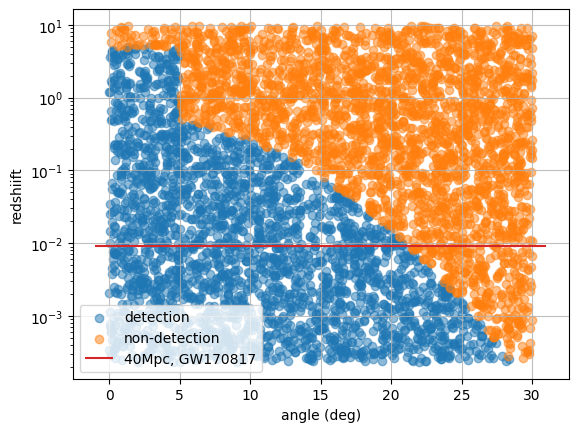

In [9]:
# blue: detection, red: non-detection
plt.scatter(angle[pdet==1], redshift[pdet==1], c='C0', label="detection", alpha=0.5)
plt.scatter(angle[pdet==0], redshift[pdet==0], c='C1', label="non-detection", alpha=0.5)

# draw a horizontal line for GW170817, 40Mpc
plt.hlines(y=dl_to_z(40), xmin=min(angle)-1, xmax=max(angle)+1, colors='C3', linestyles='solid', label='40Mpc, GW170817')

plt.xlabel("angle (deg)")
plt.ylabel("redshiift")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.8)
plt.show()

### Pdet condition checks

In [10]:
print("condition 1, pdet(angle=core_angle,distance=distance_cut): ", pdet_grb(angle=np.radians(5), distance=46652, mask_duty_cycle=False, bool=True))

print("condition 2")
print("  i) Detectable, pdet(angle=21.2deg,distance=40Mpc): ", pdet_grb(angle=np.radians(21.2), distance=40, mask_duty_cycle=False, bool=True))
print("  ii) Not-Detectable, pdet(angle=21.3deg,distance=40Mpc): ", pdet_grb(angle=np.radians(21.3), distance=40, mask_duty_cycle=False, bool=True))
print("  iii) Not-Detectable, pdet(angle=21.2deg,distance=50Mpc): ", pdet_grb(angle=np.radians(21.2), distance=50, mask_duty_cycle=False, bool=True))

condition 1, pdet(angle=core_angle,distance=distance_cut):  [1]
condition 2
  i) Detectable, pdet(angle=21.2deg,distance=40Mpc):  [1]
  ii) Not-Detectable, pdet(angle=21.3deg,distance=40Mpc):  [0]
  iii) Not-Detectable, pdet(angle=21.2deg,distance=50Mpc):  [0]


* let's write out the function so that it can be used in with LeR
  
* consider 50% duty cycle, i.e. it assume 50% of the sky is observable at any given time with SWIFT and FERMI detectors.

In [11]:
from gwsnr.utils import save_json_dict

# let's write out the function so that it can be used in with LeR
def pdet_calculator(gw_param_dict, duty_cycle=0.5, mask_duty_cycle=True, bool=True, output_jsonfile=False):
    """
    Function to calculate the probability of detection for a given angle and distance for GRB. This is based on the following condition

    Note: GRB jet, core angle <= 5 deg
    1. If angle <= 5 deg, distance <= distance_cut, then pdet(bool) = 1
    2. pdet=1, If angle=21.2 deg (at distance=40Mpc). This is by considering the GRB from GW170817 would have been difficult to detect if viewing angle<21.2 deg (at distance=40Mpc) or distance<40 Mpc (at angle=21.2 deg).

    Parameters
    ----------
    gw_param_dict : dict
        dictionary containing the parameters for the GW event
    """

    # get the angle and distance from the dictionary
    angle = gw_param_dict['theta_jn']
    if 'luminosity_distance' in gw_param_dict:
        distance = gw_param_dict['luminosity_distance']
    elif 'effective_luminosity_distance' in gw_param_dict:
        distance = gw_param_dict['effective_luminosity_distance']

    # calculate the probability of detection
    pdet = pdet_grb(angle, distance, duty_cycle=duty_cycle, mask_duty_cycle=mask_duty_cycle, bool=bool)
    pdet_net_dict = dict(pdet_net=pdet)

    # Save as JSON file, if output_jsonfile is provided
    if output_jsonfile:
        output_filename = (
            output_jsonfile if isinstance(output_jsonfile, str) else "pdet.json"
        )
        save_json_dict(pdet_net_dict, output_filename)

    # return the pdet
    return pdet_net_dict

In [12]:
# test
gw_param_dict = {'theta_jn': np.radians(np.array([1, 21.2, 90])), 'luminosity_distance': np.array([2500, 40, 40])}
print(pdet_calculator(gw_param_dict, mask_duty_cycle=False, bool=True))

{'pdet_net': array([1, 1, 0])}


## Rate calculation of GRB with LeR

All the necessary functions and parameters are defined below.

**Source related:**
* source frame mass: m1 and m2 sample from [double Gaussian](https://ler.readthedocs.io/en/latest/GW_events.html#BNS-mass-distribution:-Bimodal-Gaussian-Model) model lim[1,2.3]Mo
* Geocent time period: uniform prior, 1 year GPS: {'min_': 1238166018, 'max_': 1269702018}
* Redshift: 0 to 5, uniform, 
  * this follows [merger rate density distribution](https://ler.readthedocs.io/en/latest/GW_events.html#Merger-Rate-Density-Formula)
* ra:  sampler_uniform {'min_': 0.0, 'max_': 6.283185307179586}
* dec:  sampler_cosine [-np.pi/2, np.pi/2]
* phase : sampler_uniform {'min_': 0.0, 'max_': 6.283185307179586}
* psi: sampler_uniform {'min_': 0.0, 'max_': 3.141592653589793}
* theta_jn:   sampler_sine  [0, np.pi]

**Lens related**
* Optical depth: SIE , 
  * so zs for lensed are rejection sampled with optical depth. 
* Lens redshifts: SDSS catalogue (0 to zs), the function of zs Reenske et al. 2021 ( eqnC13). [`ler` function](https://github.com/hemantaph/ler/blob/bce3330638a13ee0883d19633abb17b98791c901/ler/lens_galaxy_population/jit_functions.py#L218)
* Velocity dispersion: gengamma, Haris et al 2018, a=2.32 / 2.67, c=2.67, vd_min=0., vd_max=600.(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gengamma.html) use in Haris et al upto zs~1.5 (with a=2.32 / 2.67, c=2.67)
* Axis ratio: Raleigh (with Velocity dispersion dependence) {'q_min': 0.2, 'q_max': 1.0}
* axis_rotation_angle : uniform {'phi_min': 0.0, 'phi_max': 6.283185307179586}
* shear: normal {'scale': 0.05}
* mass_density_spectral_index: normal {'mean': 2.0, 'std': 0.2}

**Image related:**
* Strong lensing condition: num_images>=2
* Lens equation solver: EPL+Shear, `lenstronomy`
* Source position: sample within caustic,  Ewoud et. al. 2022

In [80]:
# from ler.rates import LeR
# import numpy as np
# import matplotlib.pyplot as plt
ler = LeR(
    npool=8,
    verbose=False,
    z_max=5,
    pdet_finder=pdet_calculator,
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    event_type='BNS',
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

### Unlensed events

In [81]:
unlensed_param_detectable = ler.selecting_n_unlensed_detectable_events(
    size=800000,
    batch_size=200000,
    resume=True,
    trim_to_size=True,
    detectability_condition="pdet",
    output_jsonfile="n_unlensed_params_detectable_grb2.json",
    meta_data_file="meta_unlensed_grb2.json",
)

collected number of detectable events =  800000
storing detectable unlensed params in ./ler_data/n_unlensed_params_detectable_grb2.json
storing meta data in ./ler_data/meta_unlensed_grb2.json

 trmming final result to size=800000
collected number of detectable events =  800000
total number of events =  28654735.0
total unlensed rate (yr^-1): 11535.631303607122


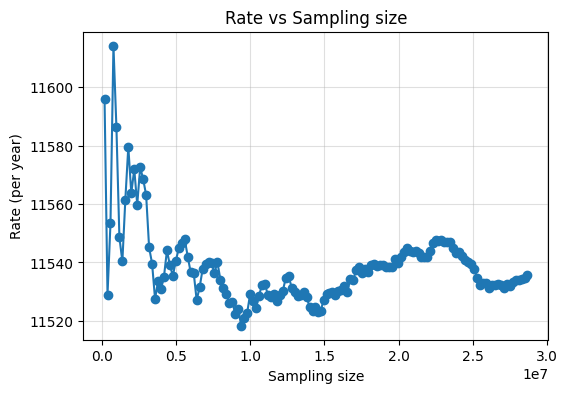

In [128]:
# getting data from json
meta_data= get_param_from_json("ler_data/meta_unlensed_grb2.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [129]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 1e7)[0]
# take average 
grb_rate_unlensed1 = np.mean(meta_data['total_rate'][idx])
print('Unlensed GRB Rate (per year) =', grb_rate_unlensed1)
# grb_rate_unlensed1 = 11483.41

Unlensed GRB Rate (per year) = 11535.400508093153


### Plots

In [130]:
unlensed_param_detectable = get_param_from_json("ler_data/n_unlensed_params_detectable_grb2.json")
zs = unlensed_param_detectable['zs']
viewing_angle = unlensed_param_detectable['theta_jn']
# radian to degree
viewing_angle = np.degrees(viewing_angle)
# if angle > 90, then angle = 180 - angle
viewing_angle[viewing_angle > 90] = viewing_angle[viewing_angle > 90]-90

viewing_angle_grb_unlensed = viewing_angle
zs_grb_unlensed = zs

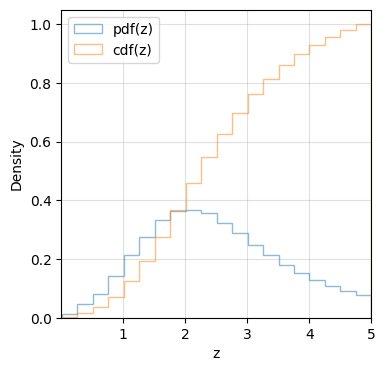

In [131]:
plt.figure(figsize=(4,4))
plt.hist(zs, bins=20, alpha=0.5, label='pdf(z)', density=True, histtype='step')
# cdf
plt.hist(zs, bins=20, alpha=0.5, label='cdf(z)', density=True, histtype='step', cumulative=True)
plt.xlabel('z')
plt.ylabel('Density')
plt.xlim(0.0001, 5)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

* for comparison refer to Fig.4 [Perley et. al.](https://arxiv.org/pdf/1504.02482)

* my rate is lower than the above paper, in the local universe.

* local merger rate density considered in `ler` for the BNS is 150.5 Gpc^-3 yr^-1 

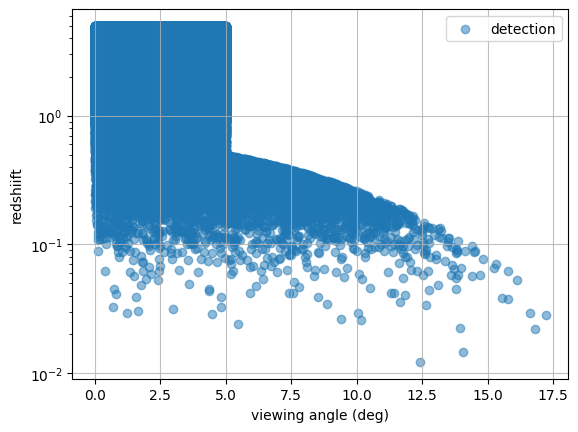

In [132]:
# blue: detection, red: non-detection
plt.scatter(viewing_angle, zs, c='C0', label="detection", alpha=0.5)

# draw a horizontal line for GW170817, 40Mpc
# plt.hlines(y=dl_to_z(40), xmin=min(angle)-1, xmax=max(angle)+1, colors='C3', linestyles='solid', label='40Mpc, GW170817')

plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.8)
plt.show()

### Checking how many of these events are detectable in GWs

In [133]:
ler = LeR(
    verbose=False,
    z_max=5,
    event_type='BNS',
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

In [134]:
unlensed_param_detectable = get_param_from_json("ler_data/n_unlensed_params_detectable_grb2.json")
snr_unlensed = ler.snr(gw_param_dict=unlensed_param_detectable)['optimal_snr_net']

In [135]:
# super-threshold only
# number of detectable events in terms of GW snr out of already detected events in term of GRB pdet
print(f"Number of unlensed detectable events in terms of GW snr is {np.sum(snr_unlensed>8)} \nout of {len(snr_unlensed)} events that are already detected in terms of GRB pdet\n")

print(f"if the rate of detectable unlensed GRBs is {grb_rate_unlensed1}, \nthen the rate of detectable GWs is {grb_rate_unlensed1*np.sum(snr_unlensed>8)/len(snr_unlensed)}\n")

print(f"ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = {len(snr_unlensed)/np.sum(snr_unlensed>8)}")

Number of unlensed detectable events in terms of GW snr is 159 
out of 800000 events that are already detected in terms of GRB pdet

if the rate of detectable unlensed GRBs is 11535.400508093153, 
then the rate of detectable GWs is 2.292660850983514

ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = 5031.446540880504


* out of 7407 unlensed GRB events 1 is detectable in GWs (snr>8) as an associated event. 

In [139]:
4.35 / 9.8e-3

443.87755102040813

In [136]:
# sub-threshold considered
# number of detectable events in terms of GW snr out of already detected events in term of GRB pdet
print(f"Number of unlensed detectable events in terms of GW snr is {np.sum(snr_unlensed>6)} \nout of {len(snr_unlensed)} events that are already detected in terms of GRB pdet\n")

print(f"if the rate of detectable unlensed GRBs is {grb_rate_unlensed1}, \nthen the rate of detectable GWs is {grb_rate_unlensed1*np.sum(snr_unlensed>6)/len(snr_unlensed)}\n")

print(f"ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = {len(snr_unlensed)/np.sum(snr_unlensed>6)}")

Number of unlensed detectable events in terms of GW snr is 302 
out of 800000 events that are already detected in terms of GRB pdet

if the rate of detectable unlensed GRBs is 11535.400508093153, 
then the rate of detectable GWs is 4.354613691805165

ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = 2649.0066225165565


* out of 2857 unlensed GRB events 1 is detectable in GWs (snr>6) as an associated event. 

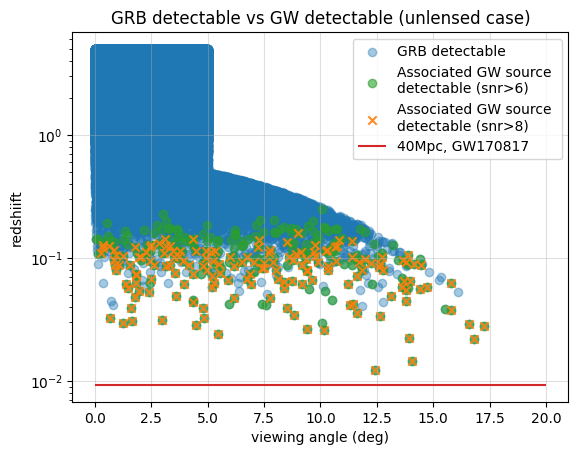

In [91]:
# blue: detection, red: non-detection
plt.scatter(viewing_angle, zs, c='C0', label="GRB detectable", alpha=0.4)
# only snr_unlensed>6
plt.scatter(viewing_angle[snr_unlensed>6], zs[snr_unlensed>6], c='C2', label="Associated GW source \ndetectable (snr>6)", alpha=0.6)
# only snr_unlensed>8
plt.scatter(viewing_angle[snr_unlensed>8], zs[snr_unlensed>8], c='C1', label="Associated GW source \ndetectable (snr>8)", alpha=0.9, marker='x')

# draw a horizontal line for GW170817, 40Mpc
plt.hlines(y=dl_to_z(40), xmin=0, xmax=20, colors='C3', linestyles='solid', label='40Mpc, GW170817')

plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.title("GRB detectable vs GW detectable (unlensed case)")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [92]:
viewing_angle_grb_unlensed = viewing_angle
zs_grb_unlensed = zs
viewing_angle_gw_unlensed = viewing_angle[snr_unlensed>6]
zs_gw_unlensed = zs[snr_unlensed>6]

### Lensed events

In [93]:
ler = LeR(
    npool=8,
    verbose=False,
    z_max=5,
    pdet_finder=pdet_calculator,
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    event_type='BNS',
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

In [94]:
lensed_param_detectable = ler.selecting_n_lensed_detectable_events(
    size=100000,
    batch_size=200000,
    # snr_threshold=[8.0,8.0],
    # num_img=[1,1],
    resume=True,
    trim_to_size=True,
    detectability_condition="pdet",
    output_jsonfile="n_lensed_params_detectable_grb2.json",
    meta_data_file="meta_lensed_grb2.json",
)

collected number of detectable events =  100000
storing detectable lensed params in ./ler_data/n_lensed_params_detectable_grb2.json
storing meta data in ./ler_data/meta_lensed_grb2.json

 trmming final result to size=100000
collected number of detectable events =  100000
total number of events =  8529123.0
total unlensed rate (yr^-1): 9.1572617860198


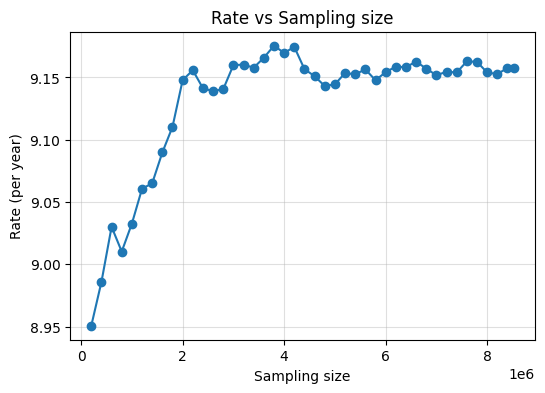

In [95]:
# getting data from json
meta_data= get_param_from_json("ler_data/meta_lensed_grb2.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [96]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 6e6)[0]
# take average 
grb_rate_lensed1 = np.mean(meta_data['total_rate'][idx])
print('Lensed GRB Rate (per year) =', grb_rate_lensed1)
# grb_rate_lensed1 = 9.15

Lensed GRB Rate (per year) = 9.157268600163025


### Plots

In [97]:
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_grb2.json")
zs = lensed_param_detectable['zs']
viewing_angle = lensed_param_detectable['theta_jn']
# radian to degree
viewing_angle = np.degrees(viewing_angle)
# if angle > 90, then angle = 180 - angle
viewing_angle[viewing_angle > 90] = viewing_angle[viewing_angle > 90]-90

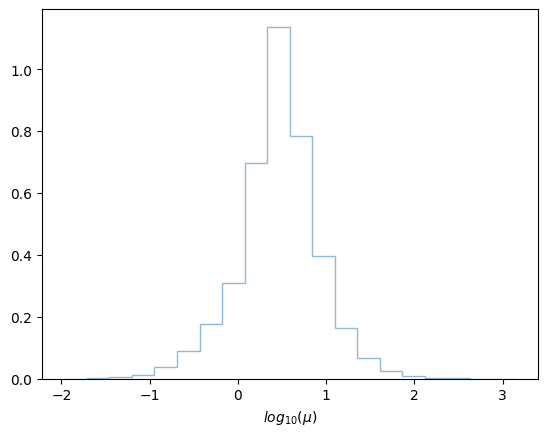

In [98]:
snr = lensed_param_detectable['pdet_net'].flatten()
idx_ = snr == 1
mu = abs(lensed_param_detectable['magnifications'].flatten())[idx_]
log10_mu = np.log10(mu)
plt.hist(log10_mu, bins=20, alpha=0.5, label='pdf(mu)', density=True, histtype='step')
plt.xlabel(r'$log_{10}(\mu$)')
plt.show()

In [99]:
ler.z_to_luminosity_distance(np.array([1])),ler.z_to_luminosity_distance(np.array([1]))/np.sqrt(10)

(array([6607.65761174]), array([2089.52480516]))

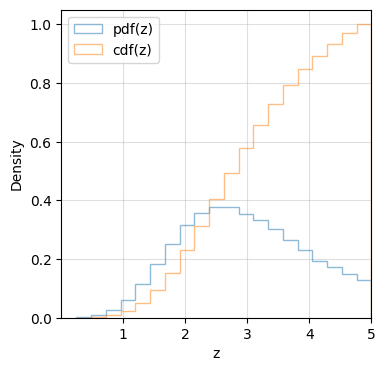

In [100]:
plt.figure(figsize=(4,4))
plt.hist(zs, bins=20, alpha=0.5, label='pdf(z)', density=True, histtype='step')
# cdf
plt.hist(zs, bins=20, alpha=0.5, label='cdf(z)', density=True, histtype='step', cumulative=True)
plt.xlabel('z')
plt.ylabel('Density')
plt.xlim(0.0001, 5)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

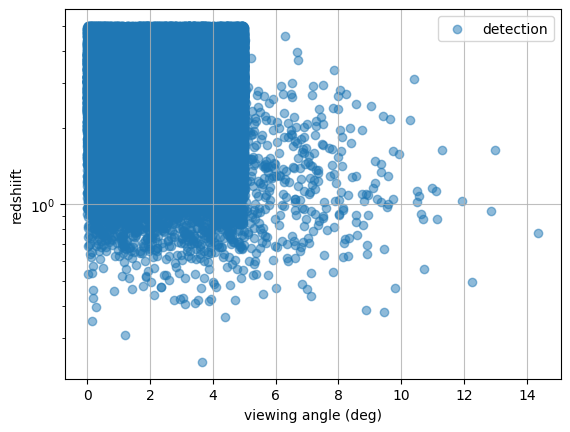

In [101]:
# blue: detection, red: non-detection
plt.scatter(viewing_angle, zs, c='C0', label="detection", alpha=0.5)

# draw a horizontal line for GW170817, 40Mpc
# plt.hlines(y=dl_to_z(40), xmin=min(angle)-1, xmax=max(angle)+1, colors='C3', linestyles='solid', label='40Mpc, GW170817')

plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.8)
plt.show()

* at high redshift (z>1), detection of off-axis GRBs is still possible for the lensed case, but not for the unlensed case.

### Out of the detected GRB events, how many are detectable in GW.

* find out GW detector SNRs of the event which are detectable in GRBs.

* check how many of them cross the SNR threshold

In [102]:
# ler initialization with default snr calculator (gwsnr)
ler = LeR(
    verbose=False,
    z_max=5,
    event_type='BNS',
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

In [103]:
# get snr for the lensed events
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_grb2.json")
snr_lensed, _ = ler.get_lensed_snrs(lensed_param_detectable, list_of_detectors=['L1','H1','V1'], snr_calculator=ler.snr)
snr_lensed = snr_lensed['optimal_snr_net']

In [104]:
# only super-threshold events
num_ =  np.sum(np.sum(snr_lensed>8, axis=1)>=2)
print(f"Number of lensed detectable events in terms of GW snr is {num_} out of {len(snr_lensed)} \nevents that are already detected in terms of GRB pdet\n")

print(f"if the rate of detectable lensed GRBs is {grb_rate_lensed1}, \nthen the rate of detectable GWs is {grb_rate_lensed1*num_/len(snr_lensed)}\n")

print(f"ratio (lensed detectable GRBs)/(lensed detectable GWs) = {len(snr_lensed)/num_}")

Number of lensed detectable events in terms of GW snr is 45 out of 100000 
events that are already detected in terms of GRB pdet

if the rate of detectable lensed GRBs is 9.157268600163025, 
then the rate of detectable GWs is 0.004120770870073362

ratio (lensed detectable GRBs)/(lensed detectable GWs) = 2222.222222222222


* out of 2000 lensed GRB events 1 is detectable in GWs (2 images snr>8) as an associated event. 

In [169]:
# sub-threshold events considered
num_ =  np.sum(np.sum(snr_lensed>6, axis=1)>=2)
print(f"Number of lensed detectable events in terms of GW snr is {num_} out of {len(snr_lensed)} \nevents that are already detected in terms of GRB pdet\n")

print(f"if the rate of detectable lensed GRBs is {grb_rate_lensed1}, \nthen the rate of detectable GWs is {grb_rate_lensed1*num_/len(snr_lensed)}\n")

print(f"ratio (lensed detectable GRBs)/(lensed detectable GWs) = {len(snr_lensed)/num_}")

Number of lensed detectable events in terms of GW snr is 107 out of 100000 
events that are already detected in terms of GRB pdet

if the rate of detectable lensed GRBs is 9.157268600163025, 
then the rate of detectable GWs is 0.009798277402174437

ratio (lensed detectable GRBs)/(lensed detectable GWs) = 934.5794392523364


* out of 833 lensed GRB events 1 is detectable in GWs (2 images snr>6) as an associated event. 

In [108]:
4.33 / 9.8e-3

441.8367346938776

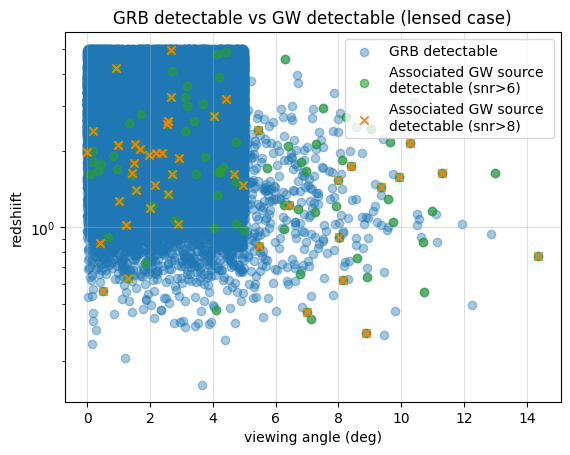

In [170]:
# blue: detection, red: non-detection
plt.scatter(viewing_angle, zs, c='C0', label="GRB detectable", alpha=0.4)
# only snr_unlensed>6
idx_ = np.sum(snr_lensed>6, axis=1)>=2
plt.scatter(viewing_angle[idx_], zs[idx_], c='C2', label="Associated GW source \ndetectable (snr>6)", alpha=0.6)
# only snr_unlensed>8
idx_ = np.sum(snr_lensed>8, axis=1)>=2
plt.scatter(viewing_angle[idx_], zs[idx_], c='C1', label="Associated GW source \ndetectable (snr>8)", alpha=0.9, marker='x')


plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.title("GRB detectable vs GW detectable (lensed case)")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [171]:
num_ = np.round(len(viewing_angle_grb_unlensed)/1248.20)
idx_ = np.random.choice(len(viewing_angle), int(num_), replace=False)

In [172]:
len(idx_), num_

(641, 641.0)

In [173]:
np.round(len(viewing_angle)/2), len(viewing_angle)

(50000.0, 100000)

In [53]:
from gwsnr import GWSNR
gwsnr = GWSNR(
    mtot_max=51,
    ifos=['L1','H1','V1'],
    gwsnr_verbose=False,
)

Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_1.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_4.pickle


In [59]:
dhor = gwsnr.detector_horizon(mass_1=1.4, mass_2=1.4, snr_th_net=6)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.94s/it]

dl_eff 389.5713941459235
optimal_snr_unscaled [32.91841147]


In [60]:
dhor['net']

array([2137.34524188])

In [56]:
dhor['net']

array([1603.00893141])

(array([0.31778667, 0.30441288, 0.32606568, 0.30759711, 0.31842351,
        0.30823396, 0.33880262, 0.31269189, 0.31842351, 0.32606568,
        0.33052361, 0.32479198, 0.30823396, 0.32606568, 0.3114182 ,
        0.31714982, 0.3209709 , 0.31651297, 0.31778667, 0.31651297]),
 array([2.87461585e-04, 1.57311041e-01, 3.14334621e-01, 4.71358200e-01,
        6.28381780e-01, 7.85405360e-01, 9.42428939e-01, 1.09945252e+00,
        1.25647610e+00, 1.41349968e+00, 1.57052326e+00, 1.72754684e+00,
        1.88457042e+00, 2.04159400e+00, 2.19861758e+00, 2.35564116e+00,
        2.51266474e+00, 2.66968832e+00, 2.82671189e+00, 2.98373547e+00,
        3.14075905e+00]),
 [<matplotlib.patches.Polygon at 0x3412cebf0>])

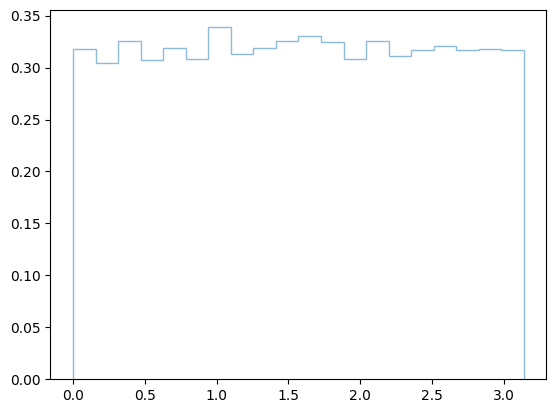

In [177]:
iota = ler.sample_theta_jn(size=10000)
plt.hist(iota, bins=20, alpha=0.5, label='pdf', density=True, histtype='step')

In [178]:
dhor['net']

array([2137.34524188])

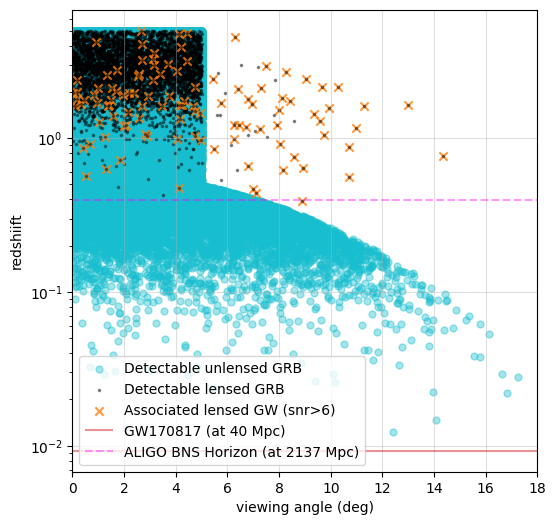

In [179]:
# blue: detection, red: non-detection
#num_ = np.round(len(viewing_angle_grb_unlensed)/1248.20)
num_ = np.round(len(viewing_angle)/20)
idx_ = np.random.choice(len(viewing_angle), int(num_), replace=False)

plt.figure(figsize=(6,6))
plt.scatter(viewing_angle_grb_unlensed, zs_grb_unlensed, c='C9', label="Detectable unlensed GRB", alpha=0.4, marker='.', s=100)
plt.scatter(viewing_angle[idx_], zs[idx_], c='k', label="Detectable lensed GRB", alpha=0.4, marker='.', s=10)
# only snr_unlensed>6
idx_ = np.sum(snr_lensed>6, axis=1)>=2
plt.scatter(viewing_angle[idx_], zs[idx_], c='C1', label="Associated lensed GW (snr>6)", alpha=0.8, marker='x')
plt.scatter(viewing_angle[idx_], zs[idx_], c='k', alpha=0.4, marker='.', s=10)
# # only snr_unlensed>8
# idx_ = np.sum(snr_lensed>8, axis=1)>=2
# plt.scatter(viewing_angle[idx_], zs[idx_], c='C1', label="Associated lensed GW\ndetectable (snr>8)", alpha=0.9, marker='x')

# draw a horizontal line for GW170817, 40Mpc
plt.hlines(y=dl_to_z(40), xmin=0, xmax=20, colors='C3', linestyles='solid', label='GW170817 (at 40 Mpc)', alpha=0.5)

# dhor 
plt.hlines(y=dl_to_z(dhor['net']), xmin=0, xmax=20, colors='magenta', linestyles='dashed', label="ALIGO BNS Horizon (at 2137 Mpc)", alpha=0.4)

plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
#plt.title("Detectable GRB vs associated detectable GW")
plt.yscale("log")
plt.xlim(0., 18)
plt.legend(loc='lower left')
plt.grid(alpha=0.4)
plt.show()

<!-- if the rate of detectable unlensed GRBs is 11483.41, 
then the rate of detectable GWs is 1.55026035

ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = 7407.407407407408

if the rate of detectable unlensed GRBs is 11483.41, 
then the rate of detectable GWs is 4.0191935

ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = 2857.1428571428573

if the rate of detectable lensed GRBs is 9.2, 
then the rate of detectable GWs is 0.0046

ratio (lensed detectable GRBs)/(lensed detectable GWs) = 2000.0

if the rate of detectable lensed GRBs is 9.2, 
then the rate of detectable GWs is 0.01104

ratio (lensed detectable GRBs)/(lensed detectable GWs) = 833.3333333333334 -->

## results

### Table for GRB and GW number of events

| Event | Unlensed | Lensed | ratio[Unlensed/Lensed] |
| --- | --- | --- | --- |
| GRB | 11483.41 | 9.2 | 1:1248.20 |
| GW(snr>8)(associated) | 1.55 | 4.6e-3 | 1:336.95 |
| ratio[GW(snr>8)/GRB] | 1:7407.41 | 1:2000 | - |
| GW(snr>6)(associated) | 4.02 | 1.1e-2 | 1:365.45 |
| ratio[GW(snr>6)/GRB] | 1:2857.14 | 1:833.33 | - |

In [143]:
1099*1087

1194613

In [ ]:
if the rate of detectable unlensed GRBs is 11528.482182495489, 
then the rate of detectable GWs is 2.161590409217904

ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = 5333.333333333333

if the rate of detectable unlensed GRBs is 11528.482182495489, 
then the rate of detectable GWs is 4.2367172020670925

ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = 2721.08843537415

if the rate of detectable lensed GRBs is 10.4946943371119, 
then the rate of detectable GWs is 0.0044077716215869985

ratio (lensed detectable GRBs)/(lensed detectable GWs) = 2380.9523809523807

if the rate of detectable lensed GRBs is 10.4946943371119, 
then the rate of detectable GWs is 0.009655118790142948

ratio (lensed detectable GRBs)/(lensed detectable GWs) = 1086.9565217391305

## GW detection first

### Unlensed events

In [14]:
# from ler.rates import LeR
# from ler.utils import get_param_from_json

ler = LeR(
    verbose=False,
    z_max=5,
    event_type='BNS',
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

### Sub

In [15]:
unlensed_param_detectable = ler.selecting_n_unlensed_detectable_events(
    size=5000,
    batch_size=200000,
    snr_threshold=6.0,
    resume=True,
    trim_to_size=True,
    output_jsonfile="n_unlensed_params_detectable_gw_sub2.json",
    meta_data_file="meta_unlensed_gw_sub2.json",
)

collected number of detectable events =  5000
storing detectable unlensed params in ./ler_data/n_unlensed_params_detectable_gw_sub2.json
storing meta data in ./ler_data/meta_unlensed_gw_sub2.json

 trmming final result to size=5000
collected number of detectable events =  5000
total number of events =  44214300.0
total unlensed rate (yr^-1): 46.725615081343406


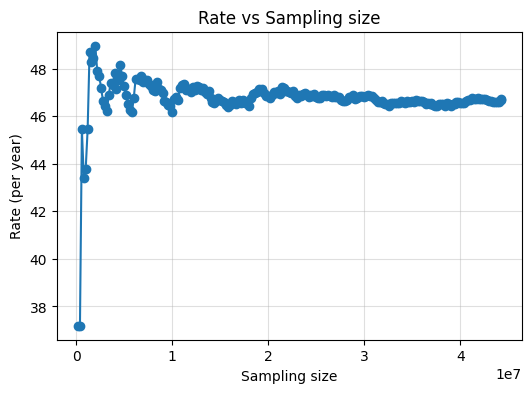

In [16]:
# rate
meta_data= get_param_from_json("ler_data/meta_unlensed_gw_sub2.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [17]:
# select only events after sampling size of
idx = np.where(meta_data['events_total'] > 6e6)[0]
# take average
gw_rate_unlensed_sub2 = np.mean(meta_data['total_rate'][idx])
print('Unlensed GW Rate (per year) =', gw_rate_unlensed_sub2)

Unlensed GW Rate (per year) = 46.79545664725557


### How many detectable events are there in terms of GRB pdet out of already detected events in terms of GW snr?

In [18]:
unlensed_param_detectable = get_param_from_json('./ler_data/n_unlensed_params_detectable_gw_sub2.json')
unlensed_grb_pdet = pdet_calculator(unlensed_param_detectable)

In [19]:
# number of detectable events in terms of GRB pdet out of already detected events in term of GW snr
print(f"Number of unlensed detectable events in terms of GRB pdet is {np.sum(unlensed_grb_pdet['pdet_net']==1)} \nout of {len(unlensed_grb_pdet['pdet_net'])} events that are already detected in terms of GW snr\n")

print(f"if the rate of detectable unlensed GWs is {gw_rate_unlensed_sub2}, \nthen the rate of detectable GRBs is {gw_rate_unlensed_sub2*np.sum(unlensed_grb_pdet['pdet_net']==1)/len(unlensed_grb_pdet['pdet_net'])}\n")

print(f"ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = {len(unlensed_grb_pdet['pdet_net'])/np.sum(unlensed_grb_pdet['pdet_net']==1)}")

Number of unlensed detectable events in terms of GRB pdet is 468 
out of 5000 events that are already detected in terms of GW snr

if the rate of detectable unlensed GWs is 46.79545664725557, 
then the rate of detectable GRBs is 4.3800547421831215

ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = 10.683760683760683


In [77]:
# select SNR > 8
unlensed_param_detectable = get_param_from_json('./ler_data/n_unlensed_params_detectable_gw_sub2.json')
snr_unlensed = ler.snr(gw_param_dict=unlensed_param_detectable)['optimal_snr_net']
idx_ = snr_unlensed > 8

gw_rate_unlensed2

In [78]:
print(f"Number of unlensed detectable events in terms of GRB pdet is {np.sum(unlensed_grb_pdet['pdet_net'][idx_]==1)} \nout of {len(unlensed_grb_pdet['pdet_net'][idx_])} events that are already detected in terms of GW snr\n")

print(f"if the rate of detectable unlensed GWs is {gw_rate_unlensed2}, \nthen the rate of detectable GRBs is {gw_rate_unlensed2*np.sum(unlensed_grb_pdet['pdet_net']==1)/len(unlensed_grb_pdet['pdet_net'])}\n")

print(f"ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = {len(unlensed_grb_pdet['pdet_net'])/np.sum(unlensed_grb_pdet['pdet_net']==1)}")

Number of unlensed detectable events in terms of GRB pdet is 206 
out of 2146 events that are already detected in terms of GW snr



NameError: name 'gw_rate_unlensed2' is not defined

In [21]:
unlensed_param_detectable = get_param_from_json('./ler_data/n_unlensed_params_detectable_gw_sub2.json')
zs_gw_unlensed = unlensed_param_detectable['zs']
viewing_angle_gw_unlensed = unlensed_param_detectable['theta_jn']
# radian to degree
viewing_angle_gw_unlensed = np.degrees(viewing_angle_gw_unlensed)
# if angle > 90, then angle = 180 - angle
viewing_angle_gw_unlensed[viewing_angle_gw_unlensed > 90] = viewing_angle_gw_unlensed[viewing_angle_gw_unlensed > 90]-90

snr_unlensed = unlensed_param_detectable['optimal_snr_net']

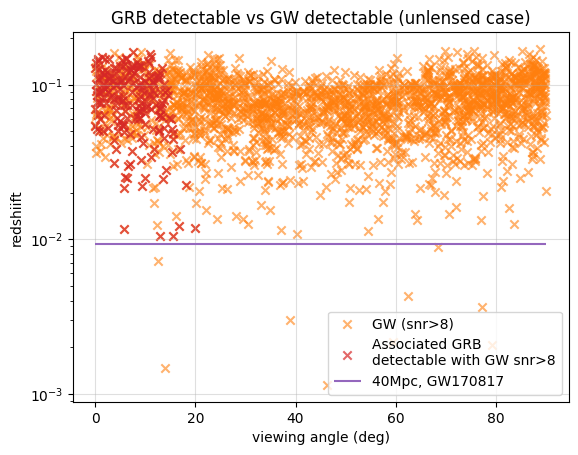

In [23]:
# blue: detection, red: non-detection
# plt.scatter(viewing_angle_gw_unlensed, zs_gw_unlensed, c='C0', label="GW (snr>6)", alpha=0.4)

# # only snr_unlensed>8
idx_ = snr_unlensed>8
plt.scatter(viewing_angle_gw_unlensed[idx_], zs_gw_unlensed[idx_], c='C1', label="GW (snr>8)", alpha=0.6, marker='x')

# only snr_unlensed>6
# idx_ = unlensed_grb_pdet['pdet_net']==1
# plt.scatter(viewing_angle_gw_unlensed[idx_], zs_gw_unlensed[idx_], c='C2', label="Associated GRB \ndetectable with GW snr>6", alpha=0.7)

# only snr_unlensed>8
idx_snr = snr_unlensed>8
idx_ = unlensed_grb_pdet['pdet_net'][idx_snr]==1
plt.scatter(viewing_angle_gw_unlensed[idx_snr][idx_], zs_gw_unlensed[idx_snr][idx_], c='C3', label="Associated GRB \ndetectable with GW snr>8", alpha=0.7, marker='x')

# draw a horizontal line for GW170817, 40Mpc
plt.hlines(y=dl_to_z(40), xmin=0, xmax=90, colors='C4', linestyles='solid', label='40Mpc, GW170817')


plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.title("GRB detectable vs GW detectable (unlensed case)")
plt.yscale("log")
# plt.xlim(0.0, 20)
# lengend position left-down
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()

In [135]:
unlensed_param_detectable = ler.selecting_n_unlensed_detectable_events(
    size=1000,
    batch_size=200000,
    snr_threshold=8.0,
    resume=True,
    trim_to_size=True,
    output_jsonfile="n_unlensed_params_detectable_gw2.json",
    meta_data_file="meta_unlensed_gw2.json",
)

collected number of detectable events =  1000
storing detectable unlensed params in ./ler_data/n_unlensed_params_detectable_gw2.json

 trmming final result to size=1000


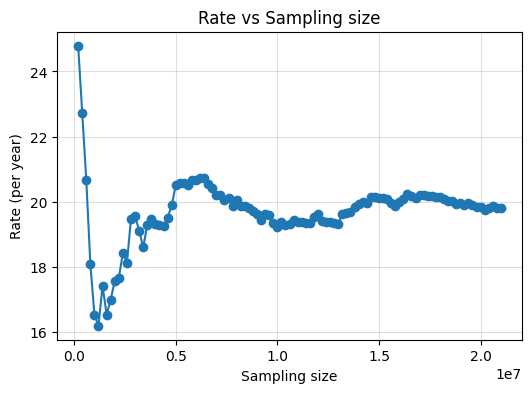

In [111]:
# rate
meta_data= get_param_from_json("ler_data/meta_unlensed_gw2.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [115]:
# select only events after sampling size of
idx = np.where(meta_data['events_total'] > 1.5e7)[0]
# take average
gw_rate_unlensed2 = np.mean(meta_data['total_rate'][idx])
print('Unlensed GW Rate (per year) =', gw_rate_unlensed2)
# gw_rate_unlensed2 = 19.79

Unlensed GW Rate (per year) = 20.000123310494473


### How many detectable events are there in terms of GRB pdet out of already detected events in terms of GW snr?

In [116]:
unlensed_param_detectable = get_param_from_json('./ler_data/n_unlensed_params_detectable_gw2.json')
unlensed_grb_pdet = pdet_calculator(unlensed_param_detectable)

In [117]:
# number of detectable events in terms of GRB pdet out of already detected events in term of GW snr
print(f"Number of unlensed detectable events in terms of GRB pdet is {np.sum(unlensed_grb_pdet['pdet_net']==1)} \nout of {len(unlensed_grb_pdet['pdet_net'])} events that are already detected in terms of GW snr\n")

print(f"if the rate of detectable unlensed GWs is {gw_rate_unlensed2}, \nthen the rate of detectable GRBs is {gw_rate_unlensed2*np.sum(unlensed_grb_pdet['pdet_net']==1)/len(unlensed_grb_pdet['pdet_net'])}\n")

print(f"ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = {len(unlensed_grb_pdet['pdet_net'])/np.sum(unlensed_grb_pdet['pdet_net']==1)}")

Number of unlensed detectable events in terms of GRB pdet is 91 
out of 1000 events that are already detected in terms of GW snr

if the rate of detectable unlensed GWs is 20.000123310494473, 
then the rate of detectable GRBs is 1.820011221254997

ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = 10.989010989010989


### Lensed events

In [25]:
ler = LeR(
    npool=8,
    verbose=False,
    z_max=5,
    event_type='BNS',
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

In [149]:
# sub-threshold events considered
lensed_param_detectable = ler.selecting_n_lensed_detectable_events(
    size=20000,
    batch_size=200000,
    snr_threshold=[6.0,6.0],
    num_img=[1,1],
    resume=True,
    output_jsonfile="n_lensed_params_detectable_gw2.json",
    meta_data_file="meta_lensed_gw2.json",
)

collected number of detectable events =  11051.0


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.69it/s]


collected number of detectable events =  11088.0
total number of events =  63000000
total lensed rate (yr^-1): 0.1374620053244461


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.06s/it]


collected number of detectable events =  11123.0
total number of events =  63200000
total lensed rate (yr^-1): 0.1374595336974804


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.05s/it]


collected number of detectable events =  11149.0
total number of events =  63400000
total lensed rate (yr^-1): 0.1373462053127912


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.82s/it]


collected number of detectable events =  11183.0
total number of events =  63600000
total lensed rate (yr^-1): 0.13733183297091917


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


collected number of detectable events =  11217.0
total number of events =  63800000
total lensed rate (yr^-1): 0.13731755073777357


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.06s/it]


collected number of detectable events =  11262.0
total number of events =  64000000
total lensed rate (yr^-1): 0.13743759800815977


100%|███████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.29it/s]


collected number of detectable events =  11302.0
total number of events =  64200000
total lensed rate (yr^-1): 0.1374960691178924


  5%|██▋                                                    | 9958/200000 [00:05<01:48, 1754.48it/s]


KeyboardInterrupt: 

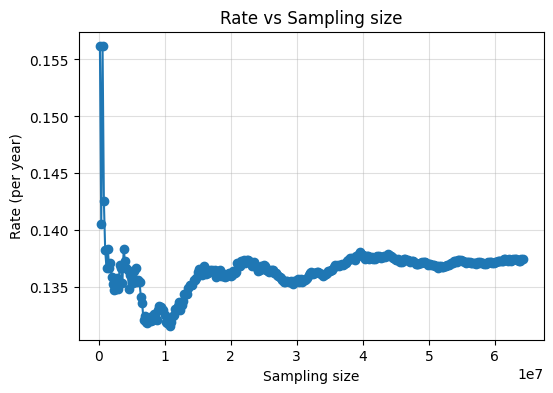

In [121]:
# rate 
meta_data= get_param_from_json("ler_data/meta_lensed_gw2.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [123]:
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_gw2.json")
# select only events after sampling size of
idx = np.where(meta_data['events_total'] > 4e6)[0]
# take average
gw_rate_lensed_sub2 = np.mean(meta_data['total_rate'][idx])
print('Lensed GW Rate (per year, sub-threshold considered) =', gw_rate_lensed_sub2)

# check how many of the events are super-threshold
snr_lensed = lensed_param_detectable['optimal_snr_net']
# only super-threshold events
num_ =  np.sum(np.sum(snr_lensed>8, axis=1)>=2)

gw_rate_lensed_super2 = gw_rate_lensed_sub2*num_/len(snr_lensed)
print('Lensed GW Rate (per year, super-threshold considered) =', gw_rate_lensed_super2)

Lensed GW Rate (per year, sub-threshold considered) = 0.13631755474334223
Lensed GW Rate (per year, super-threshold considered) = 0.04861936499472771


In [119]:
# save the data for new_lensed_param_detectable
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_gw2.json")
snr_lensed = lensed_param_detectable['optimal_snr_net']
new_lensed_param_detectable = {}

# select only super-threshold events
idx = np.where(np.sum(snr_lensed>8, axis=1)>=2)[0]
for key in lensed_param_detectable.keys():
    new_lensed_param_detectable[key] = lensed_param_detectable[key][idx]

# save the data
from ler.utils import append_json

lensed_param_detectable = append_json("ler_data/n_lensed_params_detectable_gw_super2.json", new_lensed_param_detectable, replace=True)

### How many detectable events are there in terms of GRB pdet out of already detected events in terms of GW snr?

### SUB

In [29]:
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_gw2.json")
# get snr for the lensed events
pdet_lensed,_ = ler.get_lensed_snrs(
    lensed_param=lensed_param_detectable,
    list_of_detectors=['L1','H1','V1'],
    pdet_calculator=pdet_calculator,
)

# only detectable GRBs
num_ =  np.sum(np.sum(pdet_lensed['pdet_net']==1, axis=1)>=2)

In [30]:
# number of detectable events in terms of GRB pdet out of already detected events in term of GW snr
print(f"Number of lensed detectable events in terms of GRB pdet is {num_} \nout of {len(pdet_lensed['pdet_net'])} events that are already detected in terms of GW snr\n")

print(f"if the rate of detectable lensed GWs is {gw_rate_lensed_sub2}, \nthen the rate of detectable GRBs is {gw_rate_lensed_sub2*num_/len(pdet_lensed['pdet_net'])}\n")

print(f"ratio (lensed detectable GWs)/(lensed detectable GRBs) = {len(pdet_lensed['pdet_net'])/num_}")

Number of lensed detectable events in terms of GRB pdet is 801 
out of 11302 events that are already detected in terms of GW snr

if the rate of detectable lensed GWs is 0.13631755474334223, 
then the rate of detectable GRBs is 0.009661153897488686

ratio (lensed detectable GWs)/(lensed detectable GRBs) = 14.109862671660425


### SUPER

In [31]:
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_gw_super2.json")
# get snr for the lensed events
pdet_lensed,_ = ler.get_lensed_snrs(
    lensed_param=lensed_param_detectable,
    list_of_detectors=['L1','H1','V1'],
    pdet_calculator=pdet_calculator,
)

# only detectable GRBs
num_ =  np.sum(np.sum(pdet_lensed['pdet_net']==1, axis=1)>=2)

In [32]:
# number of detectable events in terms of GRB pdet out of already detected events in term of GW snr
print(f"Number of lensed detectable events in terms of GRB pdet is {num_} \nout of {len(pdet_lensed['pdet_net'])} events that are already detected in terms of GW snr\n")

print(f"if the rate of detectable lensed GWs is {gw_rate_lensed_super2}, \nthen the rate of detectable GRBs is {gw_rate_lensed_super2*num_/len(pdet_lensed['pdet_net'])}\n")

print(f"ratio (lensed detectable GWs)/(lensed detectable GRBs) = {len(pdet_lensed['pdet_net'])/num_}")


Number of lensed detectable events in terms of GRB pdet is 326 
out of 4031 events that are already detected in terms of GW snr

if the rate of detectable lensed GWs is 0.04861936499472771, 
then the rate of detectable GRBs is 0.003932005206718242

ratio (lensed detectable GWs)/(lensed detectable GRBs) = 12.365030674846626


### Plot

In [35]:
lensed_param_detectable = get_param_from_json('./ler_data/n_lensed_params_detectable_gw2.json')
zs_gw_lensed = lensed_param_detectable['zs']
viewing_angle_gw_lensed = lensed_param_detectable['theta_jn']
# radian to degree
viewing_angle_gw_lensed = np.degrees(viewing_angle_gw_lensed)
# if angle > 90, then angle = 180 - angle
viewing_angle_gw_lensed[viewing_angle_gw_lensed > 90] = viewing_angle_gw_lensed[viewing_angle_gw_lensed > 90]-90

snr_lensed = lensed_param_detectable['optimal_snr_net']
# get snr for the lensed events
pdet_lensed,_ = ler.get_lensed_snrs(
    lensed_param=lensed_param_detectable,
    list_of_detectors=['L1','H1','V1'],
    pdet_calculator=pdet_calculator,
)


In [57]:
dhor['net']

array([1603.00893141])

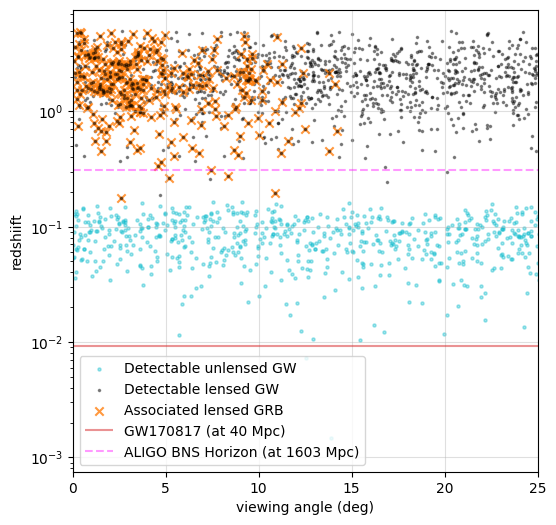

In [79]:
# blue: detection, red: non-detection
# plt.scatter(viewing_angle_gw_lensed, zs_gw_lensed, c='C0', label="GW (snr>6)", alpha=0.4)

# unlensed GW detectable
# # only snr_unlensed>8
plt.figure(figsize=(6,6))
idx_ = snr_unlensed>8
plt.scatter(viewing_angle_gw_unlensed[idx_], zs_gw_unlensed[idx_], c='C9', label="Detectable unlensed GW", alpha=0.4, marker='.', s=20)

# unlensed GRB detectable
# only snr_unlensed>8
# idx_snr = snr_unlensed>8
# idx_ = unlensed_grb_pdet['pdet_net'][idx_snr]==1
# plt.scatter(viewing_angle_gw_unlensed[idx_snr][idx_], zs_gw_unlensed[idx_snr][idx_], c='C3', label="Associated unlensed GRB", alpha=0.7, marker='x')

# plt.scatter(viewing_angle_gw_unlensed[idx_snr][idx_], zs_gw_unlensed[idx_snr][idx_], c='C9', alpha=0.4, marker='.', s=10)


# # only snr_lensed>8
idx_ = np.sum(snr_lensed>8, axis=1)>=2
plt.scatter(viewing_angle_gw_lensed[idx_], zs_gw_lensed[idx_], c='k', label="Detectable lensed GW", alpha=0.4, marker='.', s=10)

# # only snr_unlensed>6
# idx_ =  np.sum(pdet_lensed['pdet_net']==1, axis=1)>=2
# plt.scatter(viewing_angle_gw_lensed[idx_], zs_gw_lensed[idx_], c='C2', label="Associated GRB \ndetectable with GW snr>6", alpha=0.5)

# # only snr_unlensed>8
idx_snr = np.sum(snr_lensed>8, axis=1)>=2
idx_ = np.sum(pdet_lensed['pdet_net'][idx_snr]==1, axis=1)>=2
plt.scatter(viewing_angle_gw_lensed[idx_snr][idx_], zs_gw_lensed[idx_snr][idx_], c='C1', label="Associated lensed GRB", alpha=0.8, marker='x')

plt.scatter(viewing_angle_gw_lensed[idx_snr][idx_], zs_gw_lensed[idx_snr][idx_], c='k', alpha=0.4, marker='.', s=10)

# draw a horizontal line for GW170817, 40Mpc
plt.hlines(y=dl_to_z(40), xmin=0, xmax=25, colors='C3', linestyles='solid', label='GW170817 (at 40 Mpc)', alpha=0.5)

# dhor 
plt.hlines(y=dl_to_z(1603), xmin=0, xmax=25, colors='magenta', linestyles='dashed', label="ALIGO BNS Horizon (at 1603 Mpc)", alpha=0.4)


plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
#plt.title("GRB detectable vs GW detectable (lensed case)")
plt.yscale("log")
plt.xlim(0.0, 25)
# plt.ylim(0.0001, 10)
# lengend position left-down
plt.legend(loc='lower left')
plt.grid(alpha=0.4)
plt.show()

# sub unlensed
if the rate of detectable unlensed GWs is 48.14259004506836, 
then the rate of detectable GRBs is 4.284690514011084

ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = 11.235955056179776

# super unlensed
if the rate of detectable unlensed GWs is 19.79, 
then the rate of detectable GRBs is 1.89984

ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = 10.416666666666666

# sub lensed
if the rate of detectable lensed GWs is 0.13609837723024235, 
then the rate of detectable GRBs is 0.008626860240705995

ratio (lensed detectable GWs)/(lensed detectable GRBs) = 15.776119402985074

# super lensed
if the rate of detectable lensed GWs is 0.04944349749897168, 
then the rate of detectable GRBs is 0.0027039412694750136

ratio (lensed detectable GWs)/(lensed detectable GRBs) = 18.285714285714285

In [142]:
4.28 / 8.63e-3

495.9443800695249

## Final results

### Table for GRB and GW rates

| Event | Unlensed | Lensed | ratio[Unlensed/Lensed] |
| --- | --- | --- | --- |
| GW(snr>8) | 19.79 | 4.94e-2 | 1:400.6 |
| GRB (associated) | 1.9 | 2.7e-3 | 1:703.7 |
| ratio[GRB/GW(snr>8)] | 1:10.42 | 1:18.28 | - |
| GW(snr>6) | 48.14 | 1.36e-1 | 1:353.97 |
| GRB (associated) | 4.28 | 8.63e-3 | 1:495.94 |
| ratio[GRB/GW(snr>6)] | 1:11.24 | 1:15.78 | - |


In [276]:
dict_ = {'a': np.array([1,2,3]), 'b': np.array([4,5,6])}
list(dict_.values())[0]

array([1, 2, 3])

In [281]:
int(np.round(10.6))

11

Important takeaways:

Unlensed (detectable): out of 20 GW BNS events, we can expect 1 GRB counter part.

Lensed (detectable): out of 65 GW BNS events, we can expect 1 GRB counter part.